<a href="https://colab.research.google.com/github/Lucas-Buk/Machine-Learning-Metodos-Nao-Prob/blob/main/Aula_5_SVM_e_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importação das bibliotecas e métodos necessários
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Bibliotecas específicas de Machine Learning
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
# Leitura dos dados externos
DF = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Pós/ML MNP/Datasets/myiris.csv")
DF.head()   # Exibe as 5 primeiras linhas do DataFrame

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Análise descritiva
print('Nomes das espécies =', DF.Species.unique())
print('Contagem:\n', DF.Species.value_counts())

Nomes das espécies = ['setosa' 'versicolor' 'virginica']
Contagem:
 setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64


In [6]:
# Adição de informação de cor ao DataFrame
DF['Cor'] = 'red'                                       # Para espécie 'setosa': cor (padrão) = vermelho
DF.loc[DF['Species'] == 'versicolor','Cor'] = 'green'   # Espécie 'versicolor': cor = verde
DF.loc[DF['Species'] == 'virginica','Cor'] = 'blue'     # Espécie 'virginica': cor = azul
 
# Exibe as novas informações
print("Novo DataFrame:")
print(DF.head())

Novo DataFrame:
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  Cor
0           5.1          3.5           1.4          0.2  setosa  red
1           4.9          3.0           1.4          0.2  setosa  red
2           4.7          3.2           1.3          0.2  setosa  red
3           4.6          3.1           1.5          0.2  setosa  red
4           5.0          3.6           1.4          0.2  setosa  red


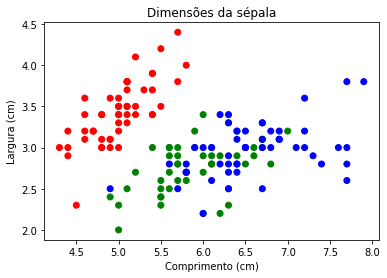

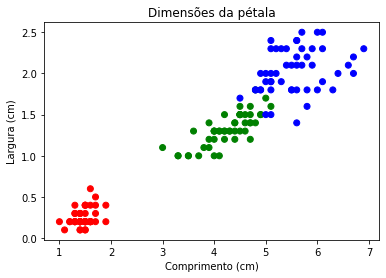

In [7]:
# Representação gráfica
# Diagrama de dispersão entre comprimento e largura da sépala
plt.scatter(DF['Sepal.Length'],DF['Sepal.Width'],color = DF['Cor'])
plt.title("Dimensões da sépala")
plt.xlabel("Comprimento (cm)")
plt.ylabel("Largura (cm)")
plt.show()    # "Consolida" a exibição do gráfico
 
# Diagrama de dispersão entre comprimento e largura da pétala
print("\n")   # Pula uma linha
plt.scatter(DF['Petal.Length'],DF['Petal.Width'],color = DF['Cor'])
plt.title("Dimensões da pétala")
plt.xlabel("Comprimento (cm)")
plt.ylabel("Largura (cm)")
plt.show()    # "Consolida" a exibição do gráfico

In [8]:
# Seleção de dados dos atributos (var independentes) e do rótulo (var dependente)
X = DF[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]   # Valores de temperatura ("x")

y = DF['Species']   # Variável dependente (y)

# Checagem das variáveis criadas
print("Dimensões do dataframe:",DF.shape)

print("\n")   # Pula uma linha
print("Dimensões:",X.shape)

print("\n")   # Pula uma linha
print("Dimensões:",y.shape)

Dimensões do dataframe: (150, 6)


Dimensões: (150, 4)


Dimensões: (150,)


In [9]:
# Pré-processamento: padronização dos atributos
escalonador = StandardScaler()      # Cria instância de objeto "escalonador"
escalonador.fit(X)                  # Armazena os dados; calcula média e variância
X_Norm = escalonador.transform(X)   # Padroniza os dados

In [10]:
# Classificador por SVM
modeloSVM = SVC()
modeloSVM.fit(X_Norm,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
# Avaliação geral da qualidade do classificador SVM
# Validação cruzada hold-out, com divisão padrão de treino/teste (75%/25%)

# Divisão dos dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X_Norm,y)

# Calcula as previsões usando APENAS os dados de teste
y_prevSVM = modeloSVM.predict(X_teste)

# Matriz de confusão
print("Matriz de confusão:\n",confusion_matrix(y_true = y_teste,y_pred = y_prevSVM))

# Relatório das métricas de qualidade
print(classification_report(y_true = y_teste,y_pred = y_prevSVM,digits = 4))

Matriz de confusão:
 [[11  0  0]
 [ 0 13  1]
 [ 0  1 12]]
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        11
  versicolor     0.9286    0.9286    0.9286        14
   virginica     0.9231    0.9231    0.9231        13

    accuracy                         0.9474        38
   macro avg     0.9505    0.9505    0.9505        38
weighted avg     0.9474    0.9474    0.9474        38



In [12]:
# Validação cruzada k-folds, com k = 10
Aval = cross_val_score(modeloSVM,X_Norm,y,cv = 10,scoring = 'accuracy')   
M = np.mean(Aval)            # Média das avaliações
DP = np.std(Aval,ddof = 1)   # Desvio padrão (amostral) das avaliações
CV_Aval = 100*DP/M           # Coeficiente de variação (%) das avaliações
 
print("Valores de acurácia obtidos:",Aval)
print("\n")   # Pula uma linha
print("Média dos valores =",M)
print("Coeficiente de variação (%) =",CV_Aval)

Valores de acurácia obtidos: [1.         0.93333333 1.         0.93333333 1.         0.93333333
 0.86666667 1.         1.         1.        ]


Média dos valores = 0.9666666666666666
Coeficiente de variação (%) = 4.876598490941707


In [13]:
# Busca em grade (Grid Search) para os hiperparâmetros C e gamma
# Grade de valores
HiperParam = {'C': [0.01,0.1,1,10,100,1000], 'gamma': [0.01,0.1,1,10,100,1000], 'kernel': ['rbf']}

# Instância da grade
modelosGrade = GridSearchCV(modeloSVM,HiperParam,scoring = 'accuracy')
modelosGrade.fit(X_Norm,y)   # Treinamentos

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [14]:
# Exibir a 'solução ótima' 
print(f'Melhor solução: {modelosGrade.best_estimator_}')

Melhor solução: SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


# Algoritmo K-Means

In [15]:
# Importação da biblioteca
from sklearn.cluster import KMeans    # Algoritmo de agrupamento (clusterização) K-Means
 
modeloKM = KMeans(n_clusters = 2)   # Cria instância do classificador
modeloKM.fit(X_Norm)                # Treina o modelo

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
print(modeloKM.cluster_centers_)    # Atributos dos centroides
print("\n")
print(modeloKM.labels_)             # Rótulos dos centroides
print("\n")
print(modeloKM.inertia_)            # Inércia dos centroides

[[-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 0.50728948 -0.42663134  0.65249366  0.62744675]]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


222.36170496502297


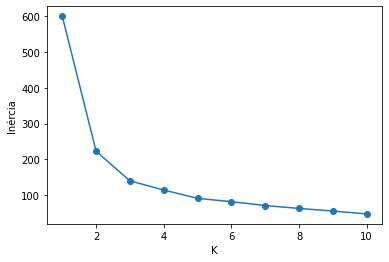

In [17]:
# Gráfico do 'cotovelo'
Lista_inercia = []
for i in range(1,11):
  modeloKM = KMeans(n_clusters = i)
  modeloKM.fit(X_Norm)
  Lista_inercia.append(modeloKM.inertia_)

plt.plot(range(1,11),Lista_inercia,marker = 'o')
plt.xlabel("K")
plt.ylabel("Inércia")
plt.show()

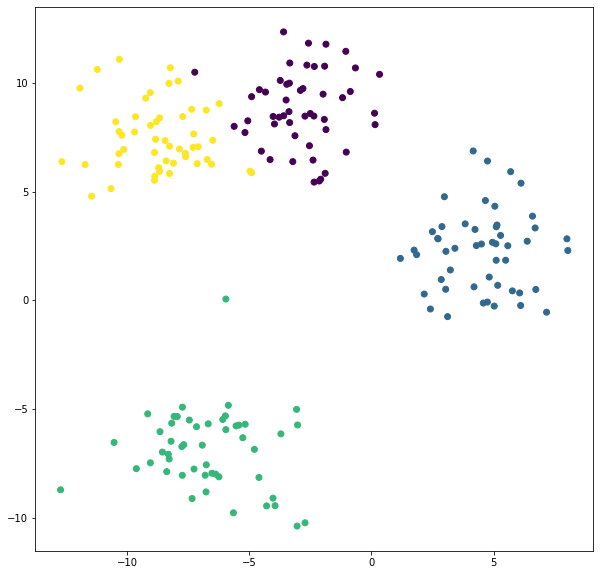

In [18]:
# Gera um conjunto de 200 pontos com coordenadas aleatórias, divididos em 4 grupos (clusters)
from sklearn.datasets import make_blobs
Atrib, Rot = make_blobs(n_samples = 200,n_features = 2,centers = 4,cluster_std = 1.8,random_state = 42)
 
plt.figure(figsize = (10,10))
plt.scatter(Atrib[:,0],Atrib[:,1],c = Rot)
plt.show()